- Basic Morphological Transform (Eroding & Dilating)
- Advance Morphological Transform (Opening, Closing, & Morphological Gradient)
- Morphological Operation (Structuring Element)

In [1]:
import cv2, matplotlib.pyplot as plt, numpy as np

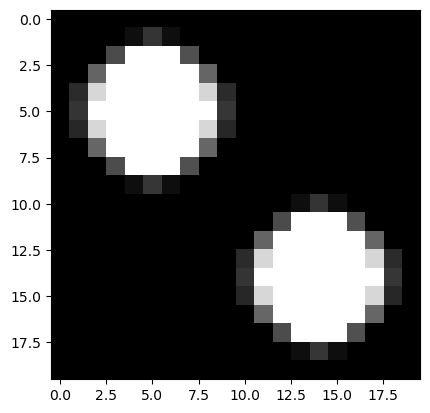

In [16]:
frame = np.zeros((20,20), np.uint8)
cv2.circle(frame, (5,5), 3, (255,255,255), -1, cv2.LINE_AA)
cv2.circle(frame, (14,14), 3, (255,255,255), -1, cv2.LINE_AA)
plt.imshow(frame, cmap="gray")

In [30]:
kernel = np.ones((3,3), np.uint8)
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

# Dilation

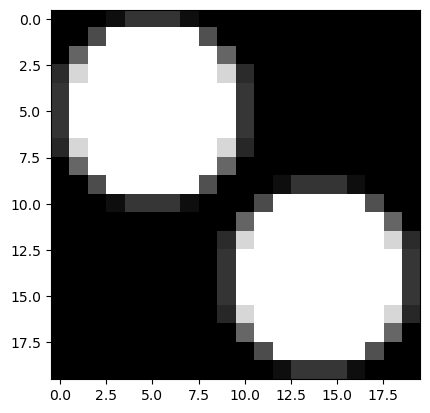

In [31]:
dilation = cv2.dilate(frame.copy(), kernel, iterations=1)
plt.imshow(dilation, cmap="gray")

# Eroding

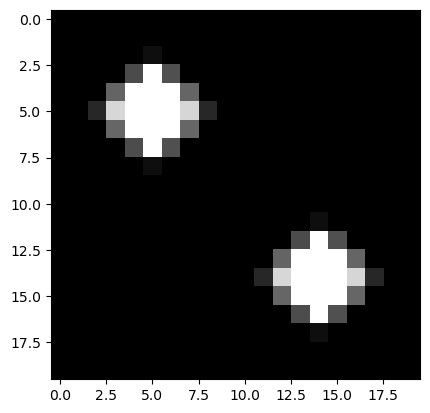

In [32]:
erosion = cv2.erode(frame.copy(), kernel, iterations=1)
plt.imshow(erosion, cmap='gray')

# Denoise MRI

In [33]:
mri = cv2.imread('../footage/noisy_mri.jpg')
gray_mri = cv2.cvtColor(mri, cv2.COLOR_BGR2GRAY)

kernel = np.ones((3,3), np.uint8)
erosion = cv2.erode(gray_mri, kernel, iterations=1)

cv2.imshow("Erosion", erosion)
cv2.imshow("mri ori", mri)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
broken_char = cv2.imread('../footage/Broker_Char.png')
gray = cv2.cvtColor(broken_char, cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray, 127,255, cv2.THRESH_BINARY)

kernel = np.ones((10,10), np.uint8)
dilation = cv2.dilate(thresh, kernel, iterations=1)

cv2.imshow("ori", broken_char)
cv2.imshow("dilated", dilation)
cv2.waitKey()
cv2.destroyAllWindows()

If you want control and precision, go with a small kernel and more iterations. If you want speed and an aggressive effect, choose a big kernel with one iteration.

In [13]:
broken_char = cv2.imread('../footage/Noised_Broken_Char.png')
gray = cv2.cvtColor(broken_char, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127,255,cv2.THRESH_BINARY)

kernel = np.ones((10,10), np.uint8)
erode = cv2.erode(thresh, kernel, iterations=1)
dilate = cv2.dilate(erode, kernel, iterations=3)

cv2.imshow('ori', broken_char)
cv2.imshow('erode', erode)
cv2.imshow('dilate', dilate)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [49]:
mri = cv2.imread('../footage/noisy_mri.jpg')
gray = cv2.cvtColor(mri, cv2.COLOR_BGR2GRAY)
kernel = np.ones((5,5), np.uint8)
morph = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel, iterations=1)
cv2.imshow('morph_open', morph)
cv2.imshow('ori', mri)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [58]:
bc2 = cv2.imread('../footage/Broken_Char_2.png')
gray = cv2.cvtColor(bc2, cv2.COLOR_BGR2GRAY)
kernel = np.ones((4,4), np.uint8)
morph = cv2.morphologyEx(gray,cv2.MORPH_CLOSE, kernel, iterations=2)

cv2.imshow("morph_close", morph)
cv2.imshow("ori", bc2)
cv2.waitKey()
cv2.destroyAllWindows()

In [61]:
char = cv2.imread('../footage/Char.png')
gray = cv2.cvtColor(char, cv2.COLOR_BGR2GRAY)
ret, gray = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

kernel = np.ones((3,3), np.uint8)
erosion = cv2.erode(gray, kernel, iterations=1)
dilation = cv2.dilate(gray, kernel, iterations=1)
gradient1 = dilation-erosion

gradient2 = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, kernel, iterations=1)

cv2.imshow("Gradient", gradient1)
cv2.imshow("Morphological Gradient", gradient1)
cv2.imshow("ori", char)
cv2.waitKey()
cv2.destroyAllWindows()

In [68]:
struk = cv2.imread('../footage/StrukBelanja.png')
gray = cv2.cvtColor(struk, cv2.COLOR_BGR2GRAY)

kernel = np.ones((2,2), np.uint8)

gradient = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, kernel, iterations=1)

cv2.imshow("ori", struk)
cv2.imshow("binary", gray)
cv2.imshow("gradient", gradient)
cv2.waitKey()
cv2.destroyAllWindows()

In [8]:
fingerprint = cv2.imread('../footage/Fingerprint.png')
gray = cv2.cvtColor(fingerprint, cv2.COLOR_BGR2GRAY)

ret,thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_TOZERO_INV)

kernel = np.ones((2,2), np.uint8)
morph = cv2.morphologyEx(thresh, cv2.MORPH_GRADIENT, kernel, iterations=1)

cv2.imshow("ori", fingerprint)
cv2.imshow("thresh", thresh)
cv2.imshow("morph", morph)
cv2.waitKey()
cv2.destroyAllWindows()

In [16]:
plate = cv2.imread('../footage/number_plate.jpg')

gray = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)

kernel = np.ones((3,3), np.uint8)
morph = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, kernel, iterations=1)
ret, thresh = cv2.threshold(morph, 100,255, cv2.THRESH_TOZERO)
con, hier = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

for cnt in con:
    cv2.drawContours(plate, [cnt], -1, (0,0,255), 1)

cv2.imshow("ori", plate)
cv2.imshow("thresh", thresh)
cv2.imshow("morph", morph)
cv2.waitKey()
cv2.destroyAllWindows()

In [4]:
bc = cv2.imread('../footage/Broker_Char.png')
gray = cv2.cvtColor(bc, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,5))
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=5)

cv2.imshow("ori", bc)
cv2.imshow("thresh", thresh)
cv2.imshow("morph", morph)
cv2.waitKey()
cv2.destroyAllWindows()

In [33]:
block = cv2.imread('../footage/blocks.jpg')
gray = cv2.cvtColor(block, cv2.COLOR_BGR2GRAY)
bitwise = cv2.bitwise_not(gray)

ret, thresh = cv2.threshold(bitwise, 30,255,cv2.THRESH_BINARY)

con, hier = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

for cnt in con:
    cv2.drawContours(block, [cnt], -1, (0,255,0), 3)

cv2.imshow("ori", block)
cv2.imshow("gray", gray)
cv2.imshow("bitwise_not", bitwise)
cv2.imshow("thresh binary", thresh)
cv2.waitKey()
cv2.destroyAllWindows()

In [30]:
hw = cv2.imread('../footage/handwritting.jpg')
gray = cv2.cvtColor(hw, cv2.COLOR_BGR2GRAY)
bitwise = cv2.bitwise_not(gray)

ret_binary, thresh_binary = cv2.threshold(bitwise, 127, 255, cv2.THRESH_BINARY)
ret_binary_otsu, thresh_binary_otsu = cv2.threshold(bitwise, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

horizintal_structure = cv2.getStructuringElement(cv2.MORPH_RECT, (25,1))
detected_line = cv2.morphologyEx(thresh_binary_otsu, cv2.MORPH_OPEN, horizintal_structure, iterations=1)

vertical_structure = cv2.getStructuringElement(cv2.MORPH_RECT, (1,4))
detected_char = cv2.morphologyEx(thresh_binary_otsu, cv2.MORPH_OPEN, vertical_structure, iterations=1)

cv2.imshow("ori", hw)
cv2.imshow("gray", gray)
cv2.imshow("birwise", bitwise)
cv2.imshow("thresh_binary", thresh_binary)
cv2.imshow("thresh_binary_otsu", thresh_binary_otsu)
cv2.imshow("detected line", detected_line)
cv2.imshow("detected char", detected_char)
cv2.waitKey(0)
cv2.destroyAllWindows()